# CNN analysis
Kristen Severson

This notebook identifies the best hyperparameters from a grid search to `cnn_base.py`.

This code analyzes `.pt` files generated from a grid search using `cnn_base.py`;
only the `.pt` file from the best model is included in this repository.
This code will not run completely without all `.pt` files.

Note that unlike `Analyze_Results_MLP_CV.ipynb`, we don't do a formal CV study for the CNN analysis.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import glob
import os


Bad key "text.kerning_factor" on line 4 in
/Users/kristen.severson.ibm/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
rw_grid = [0., 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
lr_grid = [0.1, 0.01, 0.001, 0.0001]
ni_grid = [1000, 5000, 10000, 15000, 20000]
do_grid = [0.0, 0.1, 0.2]

Look at results over different number of iterations:

In [3]:
train_plot = []
test1_plot = []
test2_plot = []

In [4]:
for ni in ni_grid:
    result = torch.load('../results/SubSampleCNN/CNN_n' + str(ni) + '_rw0.001_lr0.0001_do0.0.pt')
    train_plot.append(np.stack(result['train_err']))
    test1_plot.append(np.stack(result['test1_err']))
    test2_plot.append(np.stack(result['test2_err']))

Text(0.5, 1.0, 'Test2 Data')

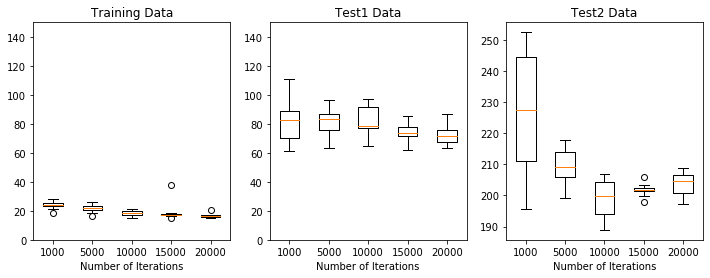

In [5]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(12,4)
axs[0].boxplot(train_plot)
axs[0].set_xticklabels(ni_grid)
axs[0].set_xlabel('Number of Iterations')
axs[0].set_title('Training Data')
axs[0].set_ylim([0,150])
axs[1].boxplot(test1_plot)
axs[1].set_xticklabels(ni_grid)
axs[1].set_xlabel('Number of Iterations')
axs[1].set_title('Test1 Data')
axs[1].set_ylim([0,150])
axs[2].boxplot(test2_plot)
axs[2].set_xticklabels(ni_grid)
axs[2].set_xlabel('Number of Iterations')
axs[2].set_title('Test2 Data')

Look at results over different learning rates:

In [6]:
train_plot = []
test1_plot = []
test2_plot = []

In [7]:
for lr in lr_grid:
    result = torch.load('../results/SubSampleCNN/CNN_n20000_rw0.001_lr' + str(lr)+ '_do0.0.pt')
    train_plot.append(np.stack(result['train_err']))
    test1_plot.append(np.stack(result['test1_err']))
    test2_plot.append(np.stack(result['test2_err']))

Text(0.5, 1.0, 'Test2 Data')

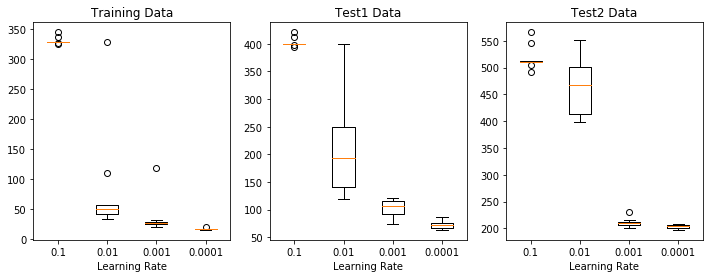

In [8]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(12,4)
axs[0].boxplot(train_plot)
axs[0].set_xticklabels(lr_grid)
axs[0].set_xlabel('Learning Rate')
axs[0].set_title('Training Data')
#axs[0].set_ylim([0,150])
axs[1].boxplot(test1_plot)
axs[1].set_xticklabels(lr_grid)
axs[1].set_xlabel('Learning Rate')
axs[1].set_title('Test1 Data')
#axs[1].set_ylim([0,150])
axs[2].boxplot(test2_plot)
axs[2].set_xticklabels(lr_grid)
axs[2].set_xlabel('Learning Rate')
axs[2].set_title('Test2 Data')

Look at results over different regularization weights:

In [9]:
train_plot = []
test1_plot = []
test2_plot = []

In [10]:
for rw in rw_grid:
    result = torch.load('../results/SubSampleCNN/CNN_n20000_rw' + str(rw) + '_lr0.0001_do0.0.pt')
    train_plot.append(np.stack(result['train_err']))
    test1_plot.append(np.stack(result['test1_err']))
    test2_plot.append(np.stack(result['test2_err']))

Text(0.5, 1.0, 'Test2 Data')

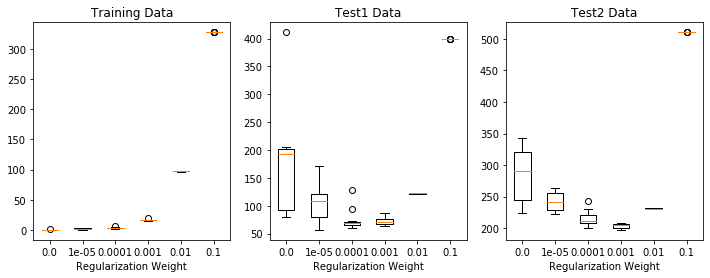

In [11]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(12,4)
axs[0].boxplot(train_plot)
axs[0].set_xticklabels(rw_grid)
axs[0].set_xlabel('Regularization Weight')
axs[0].set_title('Training Data')
#axs[0].set_ylim([0,150])
axs[1].boxplot(test1_plot)
axs[1].set_xticklabels(rw_grid)
axs[1].set_xlabel('Regularization Weight')
axs[1].set_title('Test1 Data')
#axs[1].set_ylim([0,150])
axs[2].boxplot(test2_plot)
axs[2].set_xticklabels(rw_grid)
axs[2].set_xlabel('Regularization Weight')
axs[2].set_title('Test2 Data')

Look at results over different dropout weights:

In [12]:
train_plot = []
test1_plot = []
test2_plot = []

In [13]:
for do in do_grid:
    result = torch.load('../results/SubSampleCNN/CNN_n20000_rw0.001_lr0.0001_do' + str(do) + '.pt')
    train_plot.append(np.stack(result['train_err']))
    test1_plot.append(np.stack(result['test1_err']))
    test2_plot.append(np.stack(result['test2_err']))

Text(0.5, 1.0, 'Test2 Data')

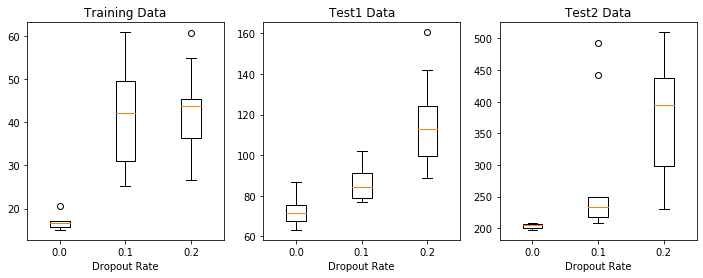

In [14]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(12,4)
axs[0].boxplot(train_plot)
axs[0].set_xticklabels(do_grid)
axs[0].set_xlabel('Dropout Rate')
axs[0].set_title('Training Data')
#axs[0].set_ylim([0,150])
axs[1].boxplot(test1_plot)
axs[1].set_xticklabels(do_grid)
axs[1].set_xlabel('Dropout Rate')
axs[1].set_title('Test1 Data')
#axs[1].set_ylim([0,150])
axs[2].boxplot(test2_plot)
axs[2].set_xticklabels(do_grid)
axs[2].set_xlabel('Dropout Rate')
axs[2].set_title('Test2 Data')

Look at interaction of regularization weight and dropout rate:

In [18]:
train_plot = np.zeros((len(do_grid), len(rw_grid)))
test1_plot = np.zeros((len(do_grid), len(rw_grid)))
test2_plot = np.zeros((len(do_grid), len(rw_grid)))

for i, do in enumerate(do_grid):
    for j, rw in enumerate(rw_grid):

        results = torch.load('../results/SubSampleCNN/CNN_n20000_rw' + str(rw) + '_lr0.0001_do' + str(do) + '.pt')
        train_plot[i, j] = np.mean(results['train_err'])
        test1_plot[i, j] = np.mean(results['test1_err'])
        test2_plot[i, j] = np.mean(results['test2_err'])


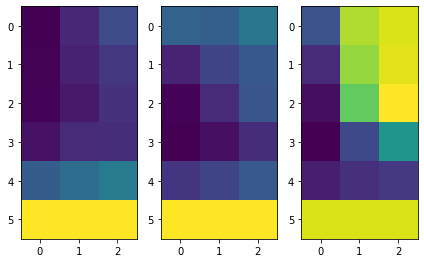

In [19]:
fig, axs = plt.subplots(1,3)
axs[0].imshow(train_plot.T)
axs[1].imshow(test1_plot.T)
axs[2].imshow(test2_plot.T)
fig.tight_layout()

In [20]:
best_results = torch.load('../results/SubSampleCNN/CNN_n20000_rw0.001_lr0.0001_do0.0.pt')

In [21]:
best_results['train_err']

[tensor(15.0462),
 tensor(17.1440),
 tensor(16.8630),
 tensor(16.7041),
 tensor(16.4568),
 tensor(15.5244),
 tensor(20.4971),
 tensor(16.4362),
 tensor(17.1846),
 tensor(15.4733)]

In [22]:
best_results['test1_err']

[tensor(68.2817),
 tensor(81.9394),
 tensor(86.6461),
 tensor(70.6343),
 tensor(63.4793),
 tensor(63.1970),
 tensor(75.8972),
 tensor(74.3186),
 tensor(72.1051),
 tensor(67.3120)]

In [23]:
best_results['test2_err']

[tensor(205.8159),
 tensor(197.1595),
 tensor(199.3055),
 tensor(206.5042),
 tensor(203.2146),
 tensor(200.5431),
 tensor(208.7654),
 tensor(208.3927),
 tensor(202.0210),
 tensor(206.2652)]

In [24]:
best_results.keys()

dict_keys(['train_pred', 'train_err', 'test1_pred', 'test1_err', 'test2_pred', 'test2_err', 'loss'])

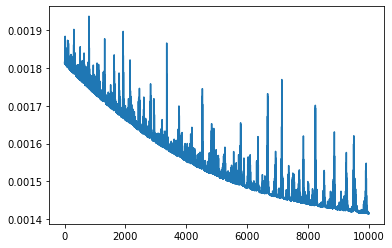

In [25]:
plt.plot(best_results['loss'][0][-10000:])

In [26]:
print(np.mean(best_results['train_err']), np.mean(best_results['test1_err']), np.mean(best_results['test2_err']))

16.732975 72.38108 203.79869


In [27]:
best_results.keys()

dict_keys(['train_pred', 'train_err', 'test1_pred', 'test1_err', 'test2_pred', 'test2_err', 'loss'])

In [28]:
def sortKeyFunc(s):
    return int(os.path.basename(s)[4:-4])

def load_dataset(folder):
    files = glob.glob('../FromPeter/predicting-battery-lifetime/data/' + folder + '/*.csv')
    files.sort(key=sortKeyFunc)  # glob returns list with arbitrary order

    l = len(files)
    dataset = np.zeros((l, 1000, 99))
    for k, file in enumerate(files):
        cell = np.genfromtxt(file, delimiter=',')
        dataset[k, :, :] = cell  # flip voltage dimension

    return dataset

#Import data
#Input data
train_data = load_dataset('train')
test1_data = load_dataset('test1')
test2_data = load_dataset('test2')

#Output data
train_out = torch.from_numpy(np.log10(
    np.genfromtxt('../data/cycle_lives/train_cycle_lives.csv'))).float()
test1_out = torch.from_numpy(np.log10(
    np.genfromtxt('../data/cycle_lives/test1_cycle_lives.csv'))).float()
test2_out = torch.from_numpy(np.log10(
    np.genfromtxt('../data/cycle_lives/test2_cycle_lives.csv'))).float()

N, V, C = train_data.shape  # number of batteries, #number of voltage points, number of cycles

train_data = torch.from_numpy(train_data[:, ::10, :] - train_data[:, ::10, 8][:, :, np.newaxis]).float()
test1_data = torch.from_numpy(test1_data[:, ::10, :] - test1_data[:, ::10, 8][:, :, np.newaxis]).float()
test2_data = torch.from_numpy(test2_data[:, ::10, :] - test2_data[:, ::10, 8][:, :, np.newaxis]).float()

# check for outliers and set values equal to zero
train_data[np.where(train_data > 1)] = 0
test1_data[np.where(test1_data > 1)] = 0
test2_data[np.where(test2_data > 1)] = 0

train_data[np.where(train_data < -0.2)] = 0
test1_data[np.where(test1_data < -0.2)] = 0
test2_data[np.where(test2_data < -0.2)] = 0

#rescale input data
stdevs = torch.std(train_data)
train_data = (train_data) / stdevs
test1_data = (test1_data) / stdevs
test2_data = (test2_data) / stdevs

#rescale output data
out_means = torch.mean(train_out)
train_out = train_out - out_means
test1_out = test1_out - out_means
test2_out = test2_out - out_means

In [29]:
test1_out_no = torch.cat([test1_out[:21], test1_out[22:]])

Text(0.5, 0, 'Predicted')

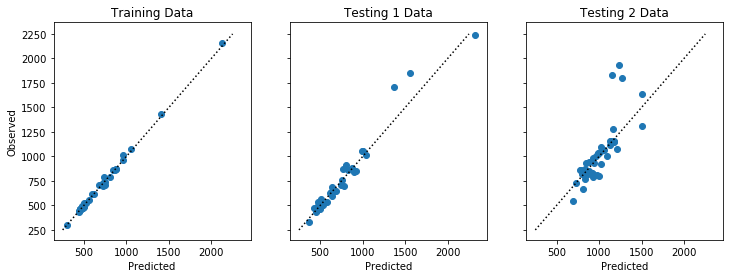

In [30]:
exp_num = 1

fig, axs = plt.subplots(1,3,sharex=True, sharey=True)
fig.set_size_inches(12,4)
axs[0].scatter(best_results['train_pred'][exp_num], 10**(train_out+out_means))
axs[0].plot(np.linspace(250,2250),np.linspace(250,2250),'k:')
axs[0].set_title('Training Data')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Observed')
axs[1].scatter(best_results['test1_pred'][exp_num], 10**(test1_out_no+out_means))
axs[1].plot(np.linspace(250,2250),np.linspace(250,2250),'k:')
axs[1].set_title('Testing 1 Data')
axs[1].set_xlabel('Predicted')
axs[2].scatter(best_results['test2_pred'][exp_num], 10**(test2_out+out_means))
axs[2].plot(np.linspace(250,2250),np.linspace(250,2250),'k:')
axs[2].set_title('Testing 2 Data')
axs[2].set_xlabel('Predicted')

Text(0.5, 0, 'Predicted')

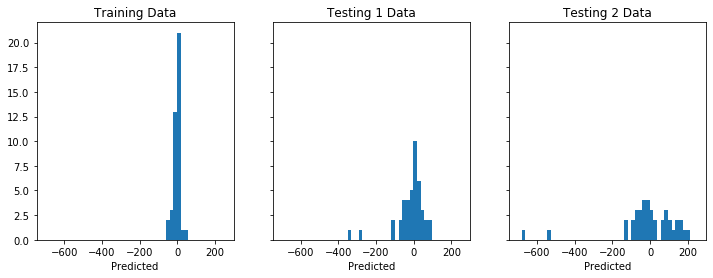

In [31]:
fig, axs = plt.subplots(1,3,sharex=True, sharey=True)
fig.set_size_inches(12,4)
axs[0].hist((best_results['train_pred'][exp_num]-  10**(train_out+out_means)).numpy(),bins=np.linspace(-700,250,50))
axs[0].set_title('Training Data')
axs[0].set_xlabel('Predicted')
axs[1].hist((best_results['test1_pred'][exp_num]- 10**(test1_out_no+out_means)).numpy(),bins=np.linspace(-700,250,50))
axs[1].set_title('Testing 1 Data')
axs[1].set_xlabel('Predicted')
axs[2].hist((best_results['test2_pred'][exp_num]- 10**(test2_out+out_means)).numpy(),bins=np.linspace(-700,250,50))
axs[2].set_title('Testing 2 Data')
axs[2].set_xlabel('Predicted')